# Introduction to the Project

In this notebook as well as the following notebooks, I will be presenting the code and analysis of my Capstone project for BrainStation. <br>

With increasing numbers of wildfires and greater publicity surrounding them, wildfires are a growing concern. Wildfires cause tremendous amounts of climatological, ecological, financial and personal damage. Therefore, it is of interest to determine which factors lead to more severe wildfires. 

In attempting to better understand this problem, this project seeks to understand the cause of and predict the total acreage of a given wildfire. Given a model which accurately predicts wildfire acreage, firefighters can get insight on whether a particular fire will remain small or is at risk of developing into a large fire. Equipped with this immediate insight, firefighters will know whether a fire needs more resources allocated to its containment and therefore mitigate damage. Further, if authorities better understand which factors lead to larger fires, then they can take steps to prevent this ahead of time. 

The data set used in this project differs from that of many other projects. The data set, obtained from the US Forest Service via Kaggle (https://www.kaggle.com/datasets/behroozsohrabi/us-wildfire-records-6th-edition?resource=download), details 2.3 million wildfires from 1992 to 2020 and describes features such as cause, land ownership, location, and more (see full data dictionary below). The target variable of my project was a binary classification of a fire into "large" (greater than or equal to 1 acre) or "small" (less than one acre). 

In this notebook, I clean the data set, conduct exploratory data analysis, and preprocess the data so that it is ready for modeling, which will be conducted in the next notebook. 

# Exploratory Data Analysis and Data Cleaning

In [182]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [183]:
# allow all columns to display
pd.set_option('display.max_columns', None)

In [184]:
#read the data into Pandas DataFrame
df = pd.read_csv('data.csv')

In [185]:
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


### ORIGINAL DATA DICTIONARY

```FOD_ID```: Unique numeric record identifier.

```FPA_ID```: Unique identifier that contains information necessary to track back to the original record in the source dataset.

```SOURCE_SYSTEM_TYPE```: Type of source database or system that the record was drawn from (FED = federal, NONFED = nonfederal, or INTERAGCY = interagency).

```SOURCE_SYSTEM```: Name of or other identifier for source database or system that the record was drawn from. See \Supplements\FPA_FOD_source_list.pdf for a list of sources and their identifier and Short (2014) for additional source information.

```NWCG_REPORTING_AGENCY```: Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report (BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, BOR = Bureau of Reclamation, DOD = Department of Defense, DOE = Department of Energy, FS = Forest Service, FWS = Fish and Wildlife Service, IA = Interagency Organization, NPS = National Park Service, ST/C&L = State, County, or Local Organization, and TRIBE = Tribal Organization).

```NWCG_REPORTING_UNIT_ID```: Active NWCG Unit Identifier for the unit preparing the fire report.

```NWCG_REPORTING_UNIT_NAME```: Active NWCG Unit Name for the unit preparing the fire report.

```SOURCE_REPORTING_UNIT```: Code for the agency unit preparing the fire report, based on code/name in the source dataset.

```SOURCE_REPORTING_UNIT_NAME```: Name of reporting agency unit preparing the fire report, based on code/name in the source dataset.

```LOCAL_FIRE_REPORT_ID```: Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year.

```LOCAL_INCIDENT_ID```: Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year.

```FIRE_CODE```: Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).

```FIRE_NAME```: Name of the incident, from the fire report (primary) or ICS-209 report (secondary).

```ICS_209_PLUS_INCIDENT_JOIN_ID```: Primary identifier needed to join into operational situation reporting data for the incident in the ICS-209-PLUS dataset.

```ICS_209_PLUS_COMPLEX_JOIN_ID```: If part of a complex, secondary identifier potentially needed to join to operational situation reporting data for the incident in the ICS-209-PLUS dataset.

```MTBS_ID```: Incident identifier, from the MTBS perimeter dataset.

```MTBS_FIRE_NAME```: Name of the incident, from the MTBS perimeter dataset.

```COMPLEX_NAME```: Name of the complex under which the fire was ultimately managed, when discernible.

```FIRE_YEAR```: Calendar year in which the fire was discovered or confirmed to exist.

```DISCOVERY_DATE```: Date on which the fire was discovered or confirmed to exist.

```DISCOVERY_DOY```: Day of year on which the fire was discovered or confirmed to exist.

```DISCOVERY_TIME```: Time of day that the fire was discovered or confirmed to exist.

```NWCG_CAUSE_CLASSIFICATION```: Broad classification of the reason the fire occurred (Human, Natural, Missing data/not specified/undetermined).

```NWCG_GENERAL_CAUSE```: Event or circumstance that started a fire or set the stage for its occurrence (Arson/incendiarism, Debris and open burning, Equipment and vehicle use, Firearms and explosives use, Fireworks, Misuse of fire by a minor, Natural, Power generation/transmission/distribution, Railroad operations and maintenance, Recreation and ceremony, Smoking, Other causes, Missing data/not specified/undetermined).

```NWCG_CAUSE_AGE_CATEGORY```: If cause attributed to children (ages 0-12) or adolescents (13-17), the value for this data element is set to Minor; otherwise null.

```CONT_DATE```: Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).

```CONT_DOY```: Day of year on which the fire was declared contained or otherwise controlled.

```CONT_TIME```: Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).

```FIRE_SIZE```: The estimate of acres within the final perimeter of the fire.

```FIRE_SIZE_CLASS```: Code for fire size based on the number of acres within the final fire perimeter (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

```LATITUDE```: Latitude (NAD83) for point location of the fire (decimal degrees).

```LONGITUDE```: Longitude (NAD83) for point location of the fire (decimal degrees).

```OWNER_DESCR```: Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.

```STATE```: Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report (not from a spatial overlay).

```COUNTY```: County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report (not from a spatial overlay).

```FIPS_CODE```: Five-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report (not from a spatial overlay).

```FIPS_NAME```: County name from the FIPS publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report (not from a spatial overlay).

In [186]:
#The Shape of the DataFrame
print(f'The raw data has {df.shape[0]} rows and {df.shape[1]} columns.')

The raw data has 2303566 rows and 39 columns.


In [187]:
# Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

In [188]:
#Initial check for duplicates
df[df.duplicated()].shape

(0, 39)

### Data Cleaning: Dropping Unnecessary Columns

There are several columns in this dataset that do not contain information useful to us. Many act as identifiers for different databases, some are simple names, and some contain redundant information. We will go through these columns and justify dropping each.

Justification for dropping these columns:

SOURCE_SYSTEM_TYPE and SOURCE_SYSTEM offer information as to where the data for that fire was obtained from. This obviously has no predictive power, and will therefore be removed. The rest of these columns act as names or ID numbers that identify the fire or the reporting agency. These have no predictive power as these are literally just names for the fire. Therefore, we remove them.

In [189]:
# Drop unnecessary columns
df.drop(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', \
         'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', \
         'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', \
         'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', \
         'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', \
         'MTBS_ID', 'MTBS_FIRE_NAME'], axis=1, inplace=True)
df.head()

,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,NaN,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,NaN,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,NaN,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [190]:
#nulls in county and FIPS code columns
df[['COUNTY', 'FIPS_CODE']].notnull().sum()

COUNTY       1637787
FIPS_CODE    1637787
dtype: int64

In [191]:
df[['LATITUDE','LONGITUDE','STATE']].isna().sum()
#no nulls in state or coordinates. 

LATITUDE     0
LONGITUDE    0
STATE        0
dtype: int64

I am dropping the FIPS_CODE and COUNTY columns because they both are proxies of location. It is more specific than state, but not as specific as the coordinates. Since we have both the coordinates (specific location) and the state (general location), we can omit these. Further, they both have a lot of nulls which would introduce holes and those holes are not easily filled. The other locations columns do not contain nulls and therefore we are not missing any data by removing the county and FIPS code columns.

Now let's take a look at the COMPLEX_NAME column. As we can see, the column has 1534 unique values and a total count of 5947 non-null values. The value with the greatest number of rows containing it has only 63, about 4% of the non-null data. This means that we would have to classify more than 99% of the data as unknown if we wanted to fill the nulls and then to bin the rest, which would lead to a hugely imbalanced class. Further, we have to consider what information this actually contains. This column is simply giving information on the complex under which the fire was contained, which may be understood as location data. We already have information on state and longitude in every single row, so we won't be losing hardly any data by omitting this row.

In [192]:
#number of unique values in Complex_name
df['COMPLEX_NAME'].nunique()

1534

In [193]:
#value counts total
df['COMPLEX_NAME'].value_counts().sum()

5947

In [194]:
#value counts of complex name
df['COMPLEX_NAME'].value_counts()

MODOC JULY COMPLEX           63
OSAGE-MIAMI COMPLEX          54
TILLER COMPLEX               50
MOTORWAY COMPLEX             47
SELWAY-SALMON WFU COMPLEX    46
                             ..
HIGHWAY 1943 COMPLEX          1
687 COMPLEX                   1
TALLGRASS COMPLEX             1
KLONDYKE COMPLEX              1
ELLIOTTS ISLAND COMPLEX       1
Name: COMPLEX_NAME, Length: 1534, dtype: int64

In [195]:
#drop complex name, county, FIPS code and FIPS name
df.drop(['COMPLEX_NAME', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'], axis=1, inplace=True)
df.head()
#It worked!

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
0,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA
1,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA
2,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA
3,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA
4,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA


### Handling Duplicates

We can handle duplicates very easily. Since each row represents a discrete event, which is a fire, we can safely remove duplicates.

In [196]:
#current df shape
df.shape

(2303566, 16)

In [197]:
#shape of duplicates dataframe
df[df.duplicated()].shape

(3634, 16)

In [198]:
df[df.duplicated()]

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
2262,2005,7/5/2005,186,400.0,Human,Arson/incendiarism,NaN,7/5/2005,186.0,712.0,0.1,A,35.834444,-106.380000,USFS,NM
5788,2005,5/23/2005,143,1833.0,Human,Arson/incendiarism,NaN,5/23/2005,143.0,1843.0,0.1,A,45.298889,-88.536389,STATE OR PRIVATE,WI
6838,2005,8/6/2005,218,1800.0,Natural,Natural,NaN,8/6/2005,218.0,1930.0,0.1,A,34.384722,-118.018056,USFS,CA
11817,2006,7/13/2006,194,1800.0,Natural,Natural,NaN,9/11/2006,254.0,1400.0,0.1,A,33.237222,-108.430556,USFS,NM
15496,2006,11/5/2006,309,1350.0,Human,Recreation and ceremony,NaN,11/5/2006,309.0,1352.0,0.1,A,37.499444,-88.677222,USFS,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289704,2020,7/4/2020,186,NaN,Human,Recreation and ceremony,NaN,7/4/2020,186.0,NaN,0.1,A,34.311955,-110.879911,USFS,AZ
2292951,2020,5/30/2020,151,1800.0,Human,Recreation and ceremony,NaN,5/30/2020,151.0,1800.0,0.1,A,37.463066,-107.679610,USFS,CO
2300744,2020,5/11/2020,132,NaN,Human,Equipment and vehicle use,NaN,5/11/2020,132.0,NaN,0.1,A,45.807008,-88.665007,PRIVATE,WI
2300895,2020,9/10/2020,254,NaN,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,9/10/2020,254.0,NaN,0.1,A,47.862149,-90.890307,USFS,MN


Considering the nature of these duplicates, I believe that removal of these duplicates is reasonable for a few reasons. Prior to removing any of the columns (most of which were various forms of ID for the data entries), we had zero duplicates. However, after we removed those columns we can see that there are 3634 duplicate entries after our initial cleaning step. This indicates that the duplicates revealed after the column removal differed in their various IDs. This may seem like the new duplicates are erroneous; however, if we consider the nature of the duplicates it quickly reveals that they are not errroneous and are legitimate duplicate data entries. For example, the first duplicate listed in the dataframe above is an example where the two duplicates have identical discovery date and time, contained date and time, cause, size, and location. It is actually impossible for there to be two fires in the same place at the same time. So, we can see that these duplicates are genuine and can safely be removed from our dataset.

In [199]:
#Drop duplicates
df.drop(df[df.duplicated()].index, axis = 0, inplace=True)

In [200]:
#New dataframe shape after removing duplicates
df.shape

(2299932, 16)

In [201]:
#Sanity Check
df.duplicated().sum()

0

### Missing Data: Handling nulls

In [202]:
#Let's find our Nulls
df.isna().sum()

FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                787077
NWCG_CAUSE_CLASSIFICATION          0
NWCG_GENERAL_CAUSE                 0
NWCG_CAUSE_AGE_CATEGORY      2224480
CONT_DATE                     892773
CONT_DOY                      892773
CONT_TIME                     988744
FIRE_SIZE                          0
FIRE_SIZE_CLASS                    0
LATITUDE                           0
LONGITUDE                          0
OWNER_DESCR                        0
STATE                              0
dtype: int64

We have null values in the columns: DISCOVERY_TIME, NWCG_CAUSE_AGE_CATEGORY, CONT_DATE, CONT_DOY, CONT_TIME. We will go through each of these and investigate the nature of them, and determine how we can handle them. First, lets take a look at the discovery time, which describes the time at which the fire was discovered.

In [203]:
#sum total of value counts
print(df['DISCOVERY_TIME'].value_counts().sum())
# number of unique discovery times
print(df['DISCOVERY_TIME'].nunique())

1512855
1440


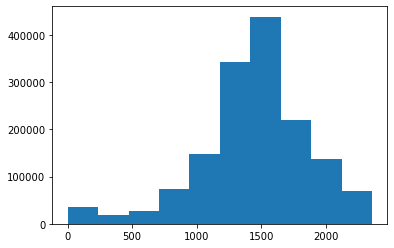

In [204]:
#A quick look at the distribution:
plt.hist(df['DISCOVERY_TIME'])
plt.show()
#It seems somewhat normal with a slight left skew

One way that we can treat this variable would be to bin it into categories of time of day as opposed to number and then to fill the nulls with "unknown". This could be a useful way to classify the time of day and account for the nulls. If we want to keep the column in numeric form, documenting the precise time, then we must either fill in the nulls with times that are essentially fabricated (since the time is unknown), or we must omit the nulls, which would result in a huge loss of data. However, if we bin the data, then we can have some categories describing the time of day and then an additional category simply listed as "unknown". Further, this "unknown" category could be useful and predictive since I would suspect that a fire that has an unknown discovery time is more likely to be greater. We can look into this after we bin.

In [205]:
#Sum total of null values
df['DISCOVERY_TIME'].isna().sum()

787077

In [206]:
#let's look at some of the data here
df['DISCOVERY_TIME'].head(25)

0     1300.0
1      845.0
2     1921.0
3     1600.0
4     1600.0
5     1800.0
6     1800.0
7     1300.0
8     1200.0
9     1800.0
10    1830.0
11    1730.0
12    1600.0
13    1200.0
14     630.0
15     930.0
16    1415.0
17    1618.0
18    2000.0
19    1030.0
20    1530.0
21    1440.0
22    1910.0
23    1250.0
24    1712.0
Name: DISCOVERY_TIME, dtype: float64

In [207]:
#Let's make sure the values are constrained between 0 and 2359
print(df['DISCOVERY_TIME'].min())
print(df['DISCOVERY_TIME'].max())

0.0
2359.0


In [208]:
# Define the bin edges for the time categories
bin_edges = [0, 400, 1000, 1600, 2200, 2400]

# Define the corresponding labels for the time categories
labels = ['Night', 'Morning', 'Midday', 'Evening', 'Night2']

# Bin the float values into categories
df['DISCOVERY_TIME'] = pd.cut(df['DISCOVERY_TIME'], bins=bin_edges, labels=False, include_lowest=True)

# Assign the category labels
df['DISCOVERY_TIME'] = df['DISCOVERY_TIME'].apply(lambda x: labels[int(x)] if pd.notnull(x) and x >= 0 else 'Unknown')


In [209]:
# new bin value counts
df['DISCOVERY_TIME'].value_counts()

Midday     792065
Unknown    787077
Evening    503233
Morning    126547
Night       47101
Night2      43909
Name: DISCOVERY_TIME, dtype: int64

In [210]:
# Bin Night2 and Night
df['DISCOVERY_TIME'] = df['DISCOVERY_TIME'].replace('Night2', 'Night')

In [211]:
# Value counts for discovery bins
df['DISCOVERY_TIME'].value_counts()

Midday     792065
Unknown    787077
Evening    503233
Morning    126547
Night       91010
Name: DISCOVERY_TIME, dtype: int64

__NWCG_CAUSE_AGE_CATEGORY__<br>
The next column in our dataset that contains nulls is the NWCG_CAUSE_AGE_CATEGORY column, which describes the age group of the human who started the fire. There are 2,228,039 nulls in this. This represents almost 97% of the dataset!

In [212]:
# Value counts
df['NWCG_CAUSE_AGE_CATEGORY'].value_counts()

Minor    75452
Name: NWCG_CAUSE_AGE_CATEGORY, dtype: int64

In [213]:
#number of nulls in this column
df['NWCG_CAUSE_AGE_CATEGORY'].isna().sum()

2224480

In [214]:
#A look at Cause value counts
df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

Human                                      1780223
Natural                                     327052
Missing data/not specified/undetermined     192657
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

In [215]:
#Compare to total df shape
print(df.shape)

(2299932, 16)


In [216]:
#Total counts of causes
df['NWCG_CAUSE_CLASSIFICATION'].value_counts().sum()

2299932

We can see here that there are 1,780,223 wildfires listed as being caused by humans. However, the vast majority of these are null values in the NWCG_CAUSE_AGE_CATEGORY column. 75,527 of the nearly 1.8 million (only 4.2%) human-caused wildfires are listed as being caused by minors. Unfortunately, we cannot assume that if the fire is not listed as being caused by a minor that this means that it was caused by an adult. So that means that we cannot fill all the remaining human-caused fires with "adult". We simply don't know. Another option is to fill all the nulls with "Unknown" when it is human caused, and "N/A" when it is not human caused. However, this would result in a column with extreme class imbalance. Only 4% of the data would be "minor", about 14% of the data would be "N/A" and the remaining 82% of the data would be "Unknown". This is likely to result in little predictive power. Because of this, the best course of action is to simply drop the column, since it contains so little useful data. 

In [217]:
#Drop category
df.drop('NWCG_CAUSE_AGE_CATEGORY', axis=1, inplace=True)
#sanity check
df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
0,2005,2/2/2005,33,Midday,Human,Power generation/transmission/distribution,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA
1,2004,5/12/2004,133,Morning,Natural,Natural,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA
2,2004,5/31/2004,152,Evening,Human,Debris and open burning,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA
3,2004,6/28/2004,180,Midday,Natural,Natural,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA
4,2004,6/28/2004,180,Midday,Natural,Natural,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA


__CONT_DATE__<br> The next column that contains nulls is the CONT_DATE column, which has the date on which the fire was declared as contained. We might notice it has the same number of nulls as CONT_DOY, which is the same information in a different form - the day of the year on which the fire was declared contained. Let's check if they are the same rows. 

In [218]:
#Check if the CONT_DATE and CONT_DOY nulls are the same rows
nulls_date = df['CONT_DATE'].isnull()
nulls_doy = df['CONT_DOY'].isnull()

same_rows = nulls_date.equals(nulls_doy)
same_rows

True

It looks like the rows are the same! This means that the wildfires containing nulls in the CONT_DATE and CONT_DOY columns simply represent fires where the contained date is unknown. <br> 

One way we could handle the CONT_DATE column in general would be to list it as CONT_YEAR, the year in which it was declared contained. This would be easy since we know the year in which it is discovered (there are no nulls in the DISCOVERY_DATE column), and it is likely to be the same year, so we could fill the nulls that way. However, there are a couple problems with this approach. First, the year isn't necessarily the same, especically if the fire was discovered in the closing days of the year. It's conceivable that a fire was discovered in late December and contained in early January. <br> 

So, our solution will be simple: we are going to fill the nulls in CONT_DATE and CONT_DOY (day of year) using the average fire duration, which will be determined by finding the difference between the CONT_DATE and the DISCOVERY_DATE Columns and taking the average. This will first necessitate formatting the date columns as datetime so that we can find the differences. Right now, they are string objects.

In [219]:
#A look at these columns
df[['DISCOVERY_DATE', 'CONT_DATE']]

,DISCOVERY_DATE,CONT_DATE
0,2/2/2005,2/2/2005
1,5/12/2004,5/12/2004
2,5/31/2004,5/31/2004
3,6/28/2004,7/3/2004
4,6/28/2004,7/3/2004
...,...,...
2303561,6/5/2020,NaN
2303562,7/11/2020,NaN
2303563,8/27/2020,NaN
2303564,8/17/2020,8/20/2020


In [220]:
#Convert them to Datetime:
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], format='%m/%d/%Y')
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], format='%m/%d/%Y')

In [221]:
#Sanity Check
df[['DISCOVERY_DATE', 'CONT_DATE']]

,DISCOVERY_DATE,CONT_DATE
0,2005-02-02,2005-02-02
1,2004-05-12,2004-05-12
2,2004-05-31,2004-05-31
3,2004-06-28,2004-07-03
4,2004-06-28,2004-07-03
...,...,...
2303561,2020-06-05,NaT
2303562,2020-07-11,NaT
2303563,2020-08-27,NaT
2303564,2020-08-17,2020-08-20


In [222]:
# Determine Fire durations
duration = df['CONT_DATE'] - df['DISCOVERY_DATE']
#take average
average_duration = duration.mean()
# fill NAs using average duration
df['CONT_DATE'].fillna(df['DISCOVERY_DATE'] + average_duration, inplace=True)
# Then fill CONT_DOY using the new CONT_DATE
df['CONT_DOY'] = df['CONT_DATE'].dt.dayofyear

In [223]:
# sanity check - have nulls been filled?
df.isna().sum()

FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
DISCOVERY_TIME                    0
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
CONT_DATE                         0
CONT_DOY                          0
CONT_TIME                    988744
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
LATITUDE                          0
LONGITUDE                         0
OWNER_DESCR                       0
STATE                             0
dtype: int64

The only remaining column with null values that must be filled is the 'CONT_TIME' column: the column giving the time at which the fire was declared contained. We will fill this in the exact way that we filled the DISCOVERY_TIME column: binning into time of day, and then filling nulls with "unknown"

In [224]:
#A look at the column
df['CONT_TIME'].head(100)

0     1730.0
1     1530.0
2     2024.0
3     1400.0
4     1200.0
       ...  
95    1330.0
96      45.0
97    2000.0
98    2315.0
99    1435.0
Name: CONT_TIME, Length: 100, dtype: float64

In [225]:
#make sure it's constrained to 0 and 2359
print(df['CONT_TIME'].min())
print(df['CONT_TIME'].max())

0.0
2359.0


In [226]:
# Define the bin edges for the time categories
bin_edges = [0, 400, 1000, 1600, 2200, 2400]

# Define the corresponding labels for the time categories
labels = ['Night', 'Morning', 'Midday', 'Evening', 'Night2']

# Bin the float values into categories
df['CONT_TIME'] = pd.cut(df['CONT_TIME'], bins=bin_edges, labels=False, include_lowest=True)

# Assign the category labels
df['CONT_TIME'] = df['CONT_TIME'].apply(lambda x: labels[int(x)] if pd.notnull(x) and x >= 0 else 'Unknown')

In [227]:
#new bin value counts
df['CONT_TIME'].value_counts()

Unknown    988744
Evening    563282
Midday     559641
Morning     87576
Night2      57281
Night       43408
Name: CONT_TIME, dtype: int64

In [228]:
#replace night2 with night
df['CONT_TIME'] = df['CONT_TIME'].replace('Night2', 'Night')

In [229]:
#new bin values counts
df['CONT_TIME'].value_counts()

Unknown    988744
Evening    563282
Midday     559641
Night      100689
Morning     87576
Name: CONT_TIME, dtype: int64

In [230]:
df.isna().sum()
#We have successfully filled all nulls in our dataframe!!!

FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
DISCOVERY_TIME               0
NWCG_CAUSE_CLASSIFICATION    0
NWCG_GENERAL_CAUSE           0
CONT_DATE                    0
CONT_DOY                     0
CONT_TIME                    0
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_DESCR                  0
STATE                        0
dtype: int64

Now that we have filled all null values in our dataset, we need to make sure that all the data is in the format that is most apt for modeling. These final cleaning steps will be accompanied by some exploratory data analysis and statistics. 

So let's start by considering the date columns all together. There are basically three pieces of information captured in the date columns altogether: The general passage of time (captured by the year in the date columns as well as FIRE_YEAR), the time of year (captured in day-of-year), and, ultimately, the duration of the fire. The last of these variables, however, is not useful for us since we are interested in building a model that predicts fire size at its inception or discovery; that is, prior to its containment. Since that information is therefore irrelevant to our problem, we can safely remove it from our dataframe. 

- __Passage of Time: Year__ - The passage of time is primarily captured in the FIRE_YEAR column. While we could pull the year out of the CONT_DATE and engineer a feature based on that, it is going to be highly correlated with FIRE_YEAR, since most fires begin and end in the same year. So, this is unnecessary and this information is captured in the FIRE_YEAR.
- __Time of Year:__ The time of year is captured in the day-of-year columns for both discovery and containment of the fire. Again, we don't need both. The information we want to capture is the time of year during which the fire occurred, specifically when the fire is discovered by the authorities. 

__FIRE_YEAR__

In order to capture the general passage of time in our dataframe, we are going to use the FIRE_YEAR column. The fire year column gives the year when the fire was discovered - so the first thing to check is that this column's value always matches the year given in the DISCOVERY_DATE column.

In [231]:
#Does 'FIRE_YEAR' always equal the year in the 'DISCOVERY_DATE'?
years = df['FIRE_YEAR'] == df['DISCOVERY_DATE'].dt.year
years.value_counts()

True     2299894
False         38
dtype: int64

In [232]:
#Let's look at the 38 false examples
df.loc[df['FIRE_YEAR'] != df['DISCOVERY_DATE'].dt.year]

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
395182,2007,2006-12-31,365,Unknown,Human,Equipment and vehicle use,2006-12-31 22:10:38.087380317,365,Unknown,2.00,B,28.91528,-81.40806,STATE,FL
395308,2007,2006-12-31,365,Unknown,Human,Equipment and vehicle use,2006-12-31 22:10:38.087380317,365,Unknown,2.00,B,27.48167,-81.05222,PRIVATE,FL
395327,2007,2006-12-31,365,Unknown,Human,Fireworks,2006-12-31 22:10:38.087380317,365,Unknown,5.00,B,26.74778,-81.76917,PRIVATE,FL
395338,2007,2006-12-31,365,Unknown,Human,Arson/incendiarism,2006-12-31 22:10:38.087380317,365,Unknown,5.00,B,25.46167,-80.43333,PRIVATE,FL
395339,2007,2006-12-31,365,Unknown,Human,Equipment and vehicle use,2006-12-31 22:10:38.087380317,365,Unknown,30.00,C,26.31667,-80.66694,STATE,FL
400184,2004,2003-12-31,365,Unknown,Human,Equipment and vehicle use,2003-12-31 22:10:38.087380317,365,Unknown,3.00,B,30.22695,-81.76167,PRIVATE,FL
400914,2004,2003-12-31,365,Unknown,Human,Debris and open burning,2003-12-31 22:10:38.087380317,365,Unknown,0.20,A,28.03444,-81.78361,PRIVATE,FL
401226,2004,2003-12-31,365,Unknown,Human,Debris and open burning,2003-12-31 22:10:38.087380317,365,Unknown,0.50,B,26.79167,-81.55723,PRIVATE,FL
401354,2004,2003-12-31,365,Unknown,Human,Missing data/not specified/undetermined,2003-12-31 22:10:38.087380317,365,Unknown,0.10,A,26.59722,-81.31445,MUNICIPAL/LOCAL,FL
403855,2009,2008-12-31,366,Unknown,Human,Fireworks,2008-12-31 22:10:38.087380317,366,Unknown,0.10,A,30.95889,-87.41861,PRIVATE,FL


As can be seen here, a lot of the dates of the DISCOVERY_DATE occur late in the year, so it's possible that these are simple errors. However, based on the definitions of the columns given, the DISCOVERY_DATE year should indeed match the FIRE_YEAR. So, we need to correct the errors. I will do this simply by defining the FIRE YEAR column as the year in the DISCOVERY_DATE column.

In [233]:
df['FIRE_YEAR'] = df['DISCOVERY_DATE'].dt.year

df.loc[df['FIRE_YEAR'] != df['DISCOVERY_DATE'].dt.year]
#returns an empty dataframe! That means it worked.

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE


__TIME OF YEAR__

Now that we have captured the passage of time in the FIRE_YEAR column, we now want to capture the time of year as a variable in itself. Because our goal is to produce a model that can predict fire size prior to its containment, the data related to containment of the fire will be removed, as that will not be available for firefighters. Therefore, we will remove the 

The dataframe in its current form captures this information in both the DISCOVERY_DOY and the CONT_DOY columns. However, as stated above, we will be removing the columns which have data related to containment because this information is unavailable at the discovery of the fire. Therefore, the DISCOVERY_DOY will be most useful.

In [234]:
df['DISCOVERY_DOY'].mean()

165.97790325974856

Now that we have successfully engineered features containing all the information and predictive power originally given in the date columns, we can remove the original columns from our dataframe. 

In [235]:
#Dropping columns
cols_to_drop = ['DISCOVERY_DATE', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME']
df.drop(cols_to_drop, axis=1,inplace=True)
#Sanity Check
df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
0,2005,33,Midday,Human,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA
1,2004,133,Morning,Natural,Natural,0.25,A,38.933056,-120.404444,USFS,CA
2,2004,152,Evening,Human,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA
3,2004,180,Midday,Natural,Natural,0.10,A,38.559167,-119.913333,USFS,CA
4,2004,180,Midday,Natural,Natural,0.10,A,38.559167,-119.933056,USFS,CA


In [236]:
#Rearrange columns:
df.columns

Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE'],
      dtype='object')

In [237]:
#rearrange columns
df = df[['FIRE_YEAR', 'DISCOVERY_TIME', 'DISCOVERY_DOY', \
        'NWCG_CAUSE_CLASSIFICATION','NWCG_GENERAL_CAUSE',\
         'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS']]
df.head()

,FIRE_YEAR,DISCOVERY_TIME,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIRE_SIZE,FIRE_SIZE_CLASS
0,2005,Midday,33,Human,Power generation/transmission/distribution,40.036944,-121.005833,USFS,CA,0.10,A
1,2004,Morning,133,Natural,Natural,38.933056,-120.404444,USFS,CA,0.25,A
2,2004,Evening,152,Human,Debris and open burning,38.984167,-120.735556,STATE OR PRIVATE,CA,0.10,A
3,2004,Midday,180,Natural,Natural,38.559167,-119.913333,USFS,CA,0.10,A
4,2004,Midday,180,Natural,Natural,38.559167,-119.933056,USFS,CA,0.10,A


Now we need to make sure that all the other columns are organized to optimize them for our modeling. We will be looking at NWCG_CAUSE_CLASSIFICATION, NWCG_GENERAL_CAUSE, OWNER_DESCR, STATE, and then finally our target variables describing FIRE_SIZE and FIRE_SIZE CLASS.

First, we need to take a look at the target variable: Fire Size. This target variable is expressed in two ways right now: a numerical column giving the acreage of the fire and a categorical column which bins the values in the numeric column. 

Let's take a look at the distribution of fire size within all of our categorical variables. 

In [238]:
#store our categorical variables in a list
cat = ['DISCOVERY_TIME', 'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_CLASSIFICATION', 'OWNER_DESCR', 'STATE']

DISCOVERY_TIME


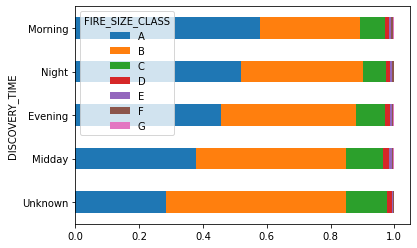


NWCG_GENERAL_CAUSE


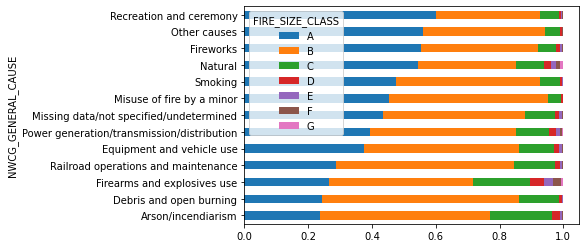


NWCG_CAUSE_CLASSIFICATION


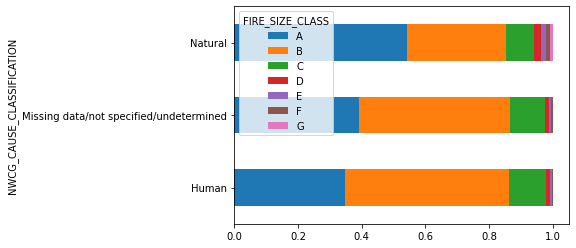


OWNER_DESCR


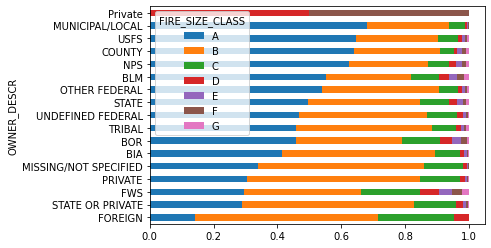


STATE


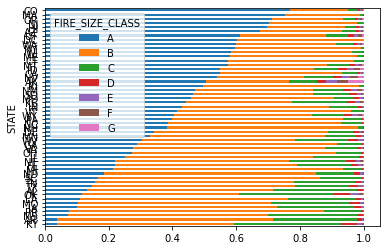

In [239]:
#looping through the categorical variables to look at the distribution of FIRE_SIZE_CLASS in those variables
for column in cat:
    print(column)
    rates = df.groupby([column, 'FIRE_SIZE_CLASS'])['FIRE_SIZE_CLASS'].count()/df.groupby(column)['FIRE_SIZE_CLASS'].count()
    rates.unstack()[['A', 'B', 'C', 'D', 'E', 'F', 'G']].sort_values("A").plot(kind = 'barh', stacked=True)
    plt.show()
    print("===================================================================")
    print("")

Since we have such a skewed distribution of the fire classes, let's try binning the classes some more into a binary classification. In order to do that, we need to look at the numerical distribution of the acreage to determine a good threshold to divide the two classes at. 

In [240]:
#Distribution of 'Fire_Size'
df['FIRE_SIZE'].describe()

count    2.299932e+06
mean     7.828262e+01
std      2.632908e+03
min      1.000000e-05
25%      1.000000e-01
50%      8.100000e-01
75%      3.000000e+00
max      6.627000e+05
Name: FIRE_SIZE, dtype: float64

In [241]:
#binning into binary variable
df.loc[df['FIRE_SIZE'] >= 1, 'New_Classes'] = 'Large'
df.loc[df['FIRE_SIZE'] < 1, 'New_Classes'] = 'Small'
df.head()

,FIRE_YEAR,DISCOVERY_TIME,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes
0,2005,Midday,33,Human,Power generation/transmission/distribution,40.036944,-121.005833,USFS,CA,0.10,A,Small
1,2004,Morning,133,Natural,Natural,38.933056,-120.404444,USFS,CA,0.25,A,Small
2,2004,Evening,152,Human,Debris and open burning,38.984167,-120.735556,STATE OR PRIVATE,CA,0.10,A,Small
3,2004,Midday,180,Natural,Natural,38.559167,-119.913333,USFS,CA,0.10,A,Small
4,2004,Midday,180,Natural,Natural,38.559167,-119.933056,USFS,CA,0.10,A,Small


In [242]:
#new distribution
df['New_Classes'].value_counts()

Small    1162925
Large    1137007
Name: New_Classes, dtype: int64

DISCOVERY_TIME


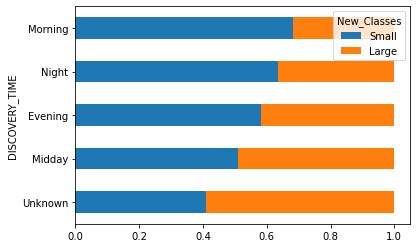


NWCG_GENERAL_CAUSE


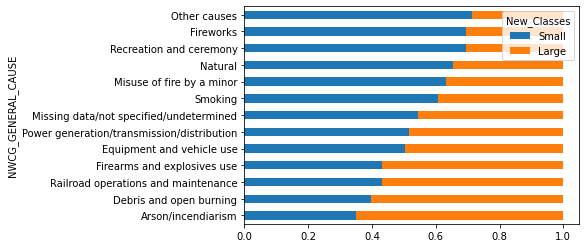


NWCG_CAUSE_CLASSIFICATION


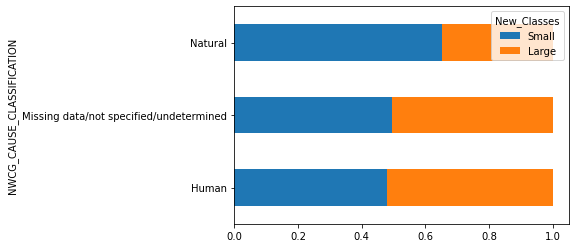


OWNER_DESCR


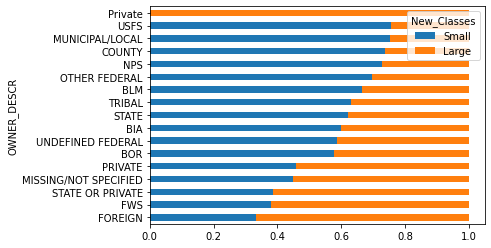


STATE


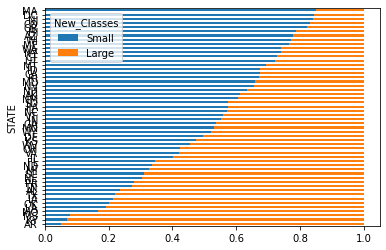

In [243]:
#A look at the distribution of the new binary class in each categorical variable
for column in cat:
    print(column)
    rates = df.groupby([column, 'New_Classes'])['New_Classes'].count()/df.groupby(column)['New_Classes'].count()
    rates.unstack()[['Small', 'Large']].sort_values("Small").plot(kind = 'barh', stacked=True)
    plt.show()
    print("===================================================================")
    print("")

This class binning not only increases the readability of our distributions, but bins all the rarer classes together so as to form a simple binary classification problem to start with once we begin modeling. 

Now let's take a look at some of these other categorical variables and format them to be optimal for modeling.

In [244]:
# Look at value counts
df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

Human                                      1780223
Natural                                     327052
Missing data/not specified/undetermined     192657
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

In [245]:
# Change 'Missing data/not specified/undetermined' to 'Unknown'
df.loc[df['NWCG_CAUSE_CLASSIFICATION'] == 'Missing data/not specified/undetermined', 'NWCG_CAUSE_CLASSIFICATION'] = 'Unknown'
df['NWCG_CAUSE_CLASSIFICATION'].value_counts()

Human      1780223
Natural     327052
Unknown     192657
Name: NWCG_CAUSE_CLASSIFICATION, dtype: int64

Let's take a look at the distribution of 'NWCG_CAUSE_CLASSIFICATION'.

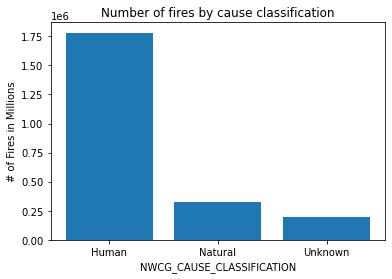

In [246]:
cause_counts = df['NWCG_CAUSE_CLASSIFICATION'].value_counts()
plt.figure()
plt.bar(x=cause_counts.index, height=cause_counts.values)
plt.xlabel('NWCG_CAUSE_CLASSIFICATION')
plt.ylabel('# of Fires in Millions')
plt.title('Number of fires by cause classification')
plt.show()

In [247]:
#View causes as counts and percents in table
cause_percents = (cause_counts / cause_counts.sum()) *100
causesdf = pd.DataFrame({'Count': cause_counts, '%': cause_percents})
causesdf

,Count,%
Human,1780223,77.403288
Natural,327052,14.220073
Unknown,192657,8.376639


In [248]:
# Same with NWCG_GENERAL_CAUSE
df['NWCG_GENERAL_CAUSE'].value_counts()

Missing data/not specified/undetermined       596674
Debris and open burning                       535744
Natural                                       327052
Arson/incendiarism                            320179
Equipment and vehicle use                     189701
Recreation and ceremony                        99061
Misuse of fire by a minor                      66213
Smoking                                        63769
Railroad operations and maintenance            37089
Power generation/transmission/distribution     32633
Fireworks                                      18584
Other causes                                   10501
Firearms and explosives use                     2732
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [249]:
# Change label
df.loc[df['NWCG_GENERAL_CAUSE'] == 'Missing data/not specified/undetermined', 'NWCG_GENERAL_CAUSE'] = 'Unknown'
df['NWCG_GENERAL_CAUSE'].value_counts()

Unknown                                       596674
Debris and open burning                       535744
Natural                                       327052
Arson/incendiarism                            320179
Equipment and vehicle use                     189701
Recreation and ceremony                        99061
Misuse of fire by a minor                      66213
Smoking                                        63769
Railroad operations and maintenance            37089
Power generation/transmission/distribution     32633
Fireworks                                      18584
Other causes                                   10501
Firearms and explosives use                     2732
Name: NWCG_GENERAL_CAUSE, dtype: int64

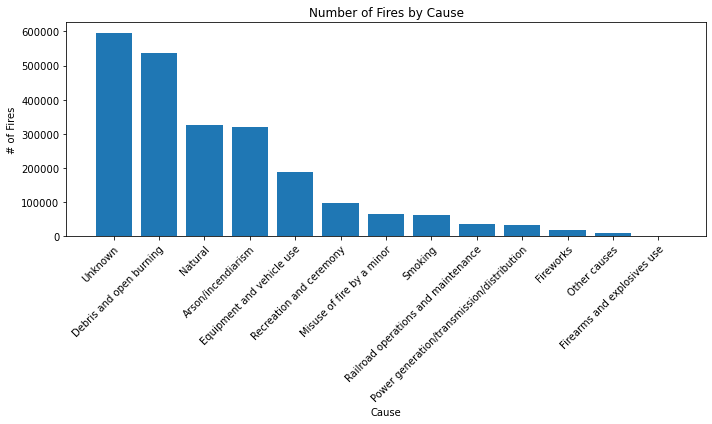

In [250]:
specific_causes=df['NWCG_GENERAL_CAUSE'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(x=specific_causes.index, height=specific_causes.values)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Cause')
plt.ylabel('# of Fires')
plt.title('Number of Fires by Cause')
plt.tight_layout()
plt.show()

In [251]:
cause_percents = (specific_causes / specific_causes.sum()) *100
specificdf = pd.DataFrame({'Count': specific_causes, '%': cause_percents})
specificdf

,Count,%
Unknown,596674,25.943115
Debris and open burning,535744,23.293906
Natural,327052,14.220073
Arson/incendiarism,320179,13.921238
Equipment and vehicle use,189701,8.248113
Recreation and ceremony,99061,4.307127
Misuse of fire by a minor,66213,2.878911
Smoking,63769,2.772647
Railroad operations and maintenance,37089,1.612613
Power generation/transmission/distribution,32633,1.418868


We can notice very quickly how in 'NWCG_CAUSE_CLASSIFICATION', there are about 193 thousand 'Unknown' causes. By contrast, the 'NWCG_GENERAL_CAUSE' has about 600 thousand unknown cases. This is because the 'Unknown' in the Specific causes includes all the unknowns from the general cause plus all the ones listed as "human" but beyond that the cause is unknown. <br>
Within the 'NWCG_GENERAL_CAUSE' column, we have too many columns that are greatly unbalanced with several rare categories. This will require binning. However, another possibility is rermoving the column entirely because they may be correlated. If the two cause columns are correlated, then we can justify removing the 'NWCG_GENERAL_CAUSE' because it is too unbalanced and it is correlated with 'NWCG_CAUSE_CLASSIFICATION' anyway, which can lead to multicollinearity and cause problems in our model.<br>
So, let's check for correlation using a Chi-Square test.

In [252]:
#start by making a crosstab of the two variables:
contingency_table = pd.crosstab(df['NWCG_CAUSE_CLASSIFICATION'], df['NWCG_GENERAL_CAUSE'])
contingency_table

NWCG_GENERAL_CAUSE,Arson/incendiarism,Debris and open burning,Equipment and vehicle use,Firearms and explosives use,Fireworks,Misuse of fire by a minor,Natural,Other causes,Power generation/transmission/distribution,Railroad operations and maintenance,Recreation and ceremony,Smoking,Unknown
NWCG_CAUSE_CLASSIFICATION,,,,,,,,,,,,,
Human,320179,535744,189701,2732,18584,66213,0,10501,32633,37089,99061,63769,404017
Natural,0,0,0,0,0,0,327052,0,0,0,0,0,0
Unknown,0,0,0,0,0,0,0,0,0,0,0,0,192657


In [253]:
#import scipy function:
from scipy.stats import chi2_contingency
#run the test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-Value: {p_val}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
exp_freq = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
exp_freq

Chi-Square Statistic: 2874011.0712690074
P-Value: 0.0
Degrees of Freedom: 24
Expected Frequencies:


NWCG_GENERAL_CAUSE,Arson/incendiarism,Debris and open burning,Equipment and vehicle use,Firearms and explosives use,Fireworks,Misuse of fire by a minor,Natural,Other causes,Power generation/transmission/distribution,Railroad operations and maintenance,Recreation and ceremony,Smoking,Unknown
NWCG_CAUSE_CLASSIFICATION,,,,,,,,,,,,,
Human,247829.074910,414683.473647,146834.812213,2114.657840,14384.627125,51251.039378,253149.002925,8128.119320,25259.015118,28708.105651,76676.471567,49359.303009,461845.297297
Natural,45529.686229,76183.185715,26975.619911,388.492383,2642.658291,9415.536666,46507.031818,1493.249823,4640.436289,5274.082724,14086.546112,9067.998092,84847.475946
Unknown,26820.238861,44877.340638,15890.567876,228.849776,1556.714585,5546.423956,27395.965256,879.630857,2733.548592,3106.811624,8297.982322,5341.698899,49981.226757


These results are not surprising! Since they're so highly correlated, we can justify removing the 'NWCG_GENERAL_CAUSE' column without any worry. Such multicollinearity is going to cause problems, and there is the problem of binning. 

In [254]:
#Drop general cause
df.drop('NWCG_GENERAL_CAUSE', axis=1, inplace=True)

Now let's look at the variable "OWNER_DESCR" which describes the owner of the land on which the fire started. 

In [255]:
df['OWNER_DESCR'].value_counts()

MISSING/NOT SPECIFIED    1066242
PRIVATE                   597305
USFS                      214294
BIA                       123210
BLM                        73310
STATE OR PRIVATE           71543
STATE                      56352
NPS                        19903
MUNICIPAL/LOCAL            19570
OTHER FEDERAL              15226
FWS                        13892
TRIBAL                     11675
UNDEFINED FEDERAL          10531
COUNTY                      6336
BOR                          520
FOREIGN                       21
Private                        2
Name: OWNER_DESCR, dtype: int64

In [256]:
# convert those two "Private" values to 'PRIVATE'
df.loc[df['OWNER_DESCR'] == 'Private', 'OWNER_DESCR'] = 'PRIVATE'
#convert 'MISSING/NOT SPECIFIED' to 'Unknown'
df.loc[df['OWNER_DESCR'] == 'MISSING/NOT SPECIFIED', 'OWNER_DESCR'] = 'Unknown'
df['OWNER_DESCR'].value_counts()

Unknown              1066242
PRIVATE               597307
USFS                  214294
BIA                   123210
BLM                    73310
STATE OR PRIVATE       71543
STATE                  56352
NPS                    19903
MUNICIPAL/LOCAL        19570
OTHER FEDERAL          15226
FWS                    13892
TRIBAL                 11675
UNDEFINED FEDERAL      10531
COUNTY                  6336
BOR                      520
FOREIGN                   21
Name: OWNER_DESCR, dtype: int64

In [257]:
#View value counts and percents of total
counts = df['OWNER_DESCR'].value_counts()
owner_percents = (counts / counts.sum()) *100
ownersdf = pd.DataFrame({'Count': counts, '%': owner_percents})
ownersdf

,Count,%
Unknown,1066242,46.359718
PRIVATE,597307,25.970637
USFS,214294,9.317406
BIA,123210,5.357115
BLM,73310,3.187486
STATE OR PRIVATE,71543,3.110657
STATE,56352,2.450159
NPS,19903,0.865373
MUNICIPAL/LOCAL,19570,0.850895
OTHER FEDERAL,15226,0.662020


There are two ways we could bin these. Let's take a look at both and choose the one with the most balanced classes.

In [258]:
bins1 = {
    'Unknown': ['Unknown', 'STATE OR PRIVATE'],
    'Federal': ['USFS', 'BIA', 'BLM', 'NPS', 'OTHER FEDERAL', 'FWS', 'UNDEFINED FEDERAL', 'BOR'],
    'Private': ['PRIVATE'],
    'Other': ['STATE', 'MUNICIPAL/LOCAL', 'TRIBAL', 'COUNTY', 'FOREIGN']
}
bins2 = {
    'Unknown': ['Unknown', 'STATE OR PRIVATE'],
    'Private': ['PRIVATE'],
    'Government': ['USFS', 'BIA', 'BLM', 'STATE', 'NPS', 'MUNICIPAL/LOCAL', 'OTHER FEDERAL', 'FWS', 'UNDEFINED FEDERAL', 'COUNTY', 'BOR', 'FOREIGN']
}

In [259]:
#define functions that bin the owner categories.
def assign_bins1(owner):
    for my_bin, owners in bins1.items():
        if owner in owners:
            return my_bin
df['ownerbins1'] = df['OWNER_DESCR'].apply(assign_bins1)

def assign_bins2(owner):
    for my_bin, owners in bins2.items():
        if owner in owners:
            return my_bin
df['ownerbins2'] = df['OWNER_DESCR'].apply(assign_bins2)

In [260]:
#Now view binned categories and percents
counts = df['ownerbins1'].value_counts()
owner_percents = (counts / counts.sum()) *100
ownersdf = pd.DataFrame({'Count': counts, '%': owner_percents})
ownersdf

,Count,%
Unknown,1137785,49.470376
Private,597307,25.970637
Federal,470886,20.473910
Other,93954,4.085077


In [261]:
#Now view binned categories and percents
counts = df['ownerbins2'].value_counts()
owner_percents = (counts / counts.sum()) *100
ownersdf = pd.DataFrame({'Count': counts, '%': owner_percents})
ownersdf

,Count,%
Unknown,1137785,49.722780
Private,597307,26.103143
Government,553165,24.174077


The second binning method gives more balanced classes. In the first, we have the 'Other' category which is only 4% of the data. We want to avoid rare classes; so we will use the second binning method. 

In [262]:
df['OWNER_DESCR'] = df['ownerbins2']
df.drop(['ownerbins1', 'ownerbins2'], axis=1, inplace=True)
df.head()

,FIRE_YEAR,DISCOVERY_TIME,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes
0,2005,Midday,33,Human,40.036944,-121.005833,Government,CA,0.10,A,Small
1,2004,Morning,133,Natural,38.933056,-120.404444,Government,CA,0.25,A,Small
2,2004,Evening,152,Human,38.984167,-120.735556,Unknown,CA,0.10,A,Small
3,2004,Midday,180,Natural,38.559167,-119.913333,Government,CA,0.10,A,Small
4,2004,Midday,180,Natural,38.559167,-119.933056,Government,CA,0.10,A,Small


Now we will look at the STATE column. This column obviously has pretty high cardinality, which is cause for concern. We may bin the categories if necessary. Let's look at the value counts in order to get an idea of the distribution. 

In [263]:
#value counts of each state
df['STATE'].value_counts()

CA    250386
GA    184969
TX    180041
NC    129834
AZ    104808
FL    103392
NY     99117
SC     88008
MS     84705
AL     74728
OR     71381
CO     68586
MT     51928
MN     51033
OK     50176
NM     43550
ID     42042
WA     40749
WI     38157
AR     37941
UT     36927
SD     36371
TN     34523
LA     33112
NJ     32072
KY     30874
WV     25055
VA     24525
MO     24471
PR     21627
NV     20181
ND     20008
WY     19991
MI     19122
KS     18572
ME     16431
AK     15188
PA     12855
NE     11742
HI      9967
MA      8368
CT      6707
OH      5668
IA      5668
MD      4156
NH      3075
IL      3019
IN      2277
RI       787
VT       781
DE       198
DC        83
Name: STATE, dtype: int64

In [264]:
#number of unique categories
df['STATE'].nunique()

52

In [265]:
#value counts with percents of total
counts = df['STATE'].value_counts()
state_percents = (counts / counts.sum()) *100
statesdf = pd.DataFrame({'Count': counts, '%': state_percents})
statesdf

,Count,%
CA,250386,10.886670
GA,184969,8.042368
TX,180041,7.828101
NC,129834,5.645123
AZ,104808,4.557004
FL,103392,4.495437
NY,99117,4.309562
SC,88008,3.826548
MS,84705,3.682935
AL,74728,3.249140


Since the State categories have such high cardinality and also are unbalanced classes (with percents ranging from 0.004% of all wildfires in DC to 10% in CA), we are going to bin them by region.

In [266]:
#We are going to bin into region.
regions = {
    "West": ["CA", "AZ", "OR", "WA", "NV", "ID", "MT", "WY", "CO", "UT", "NM", "AK"],
    "South": ["TX", "GA", "FL", "SC", "MS", "AL", "LA", "AR", "OK", "TN", "PR"],
    "Midwest": ["NC", "NY", "MN", "SD", "KY", "MO", "ND", "MI", "KS", "IA", "NE", "IL", "IN", "OH"],
    "East": ["VA", "WV", "NJ", "ME", "PA", "HI", "MA", "CT", "MD", "NH", "RI", "VT", "DE", "DC"]
}

def assign_regions(state):
    for region, states in regions.items():
        if state in states:
            return region
df['REGION'] = df['STATE'].apply(assign_regions)

In [267]:
#sanity check
df.head()

,FIRE_YEAR,DISCOVERY_TIME,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes,REGION
0,2005,Midday,33,Human,40.036944,-121.005833,Government,CA,0.10,A,Small,West
1,2004,Morning,133,Natural,38.933056,-120.404444,Government,CA,0.25,A,Small,West
2,2004,Evening,152,Human,38.984167,-120.735556,Unknown,CA,0.10,A,Small,West
3,2004,Midday,180,Natural,38.559167,-119.913333,Government,CA,0.10,A,Small,West
4,2004,Midday,180,Natural,38.559167,-119.933056,Government,CA,0.10,A,Small,West


In [268]:
#A look at the distribution of regions. 
counts = df['REGION'].value_counts()
region_percents = (counts / counts.sum()) *100
regionsdf = pd.DataFrame({'Count': counts, '%': region_percents})
regionsdf

,Count,%
South,893222,39.492080
West,765717,33.854694
Midwest,457776,20.239679
East,145060,6.413547


The distribution, while not balanced, is balanced enough that we can move forward with our analysis and drop the STATE column. 

In [269]:
#drop state column
df.drop('STATE', axis=1, inplace=True)

In [270]:
#sanity check
df.head()

,FIRE_YEAR,DISCOVERY_TIME,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes,REGION
0,2005,Midday,33,Human,40.036944,-121.005833,Government,0.10,A,Small,West
1,2004,Morning,133,Natural,38.933056,-120.404444,Government,0.25,A,Small,West
2,2004,Evening,152,Human,38.984167,-120.735556,Unknown,0.10,A,Small,West
3,2004,Midday,180,Natural,38.559167,-119.913333,Government,0.10,A,Small,West
4,2004,Midday,180,Natural,38.559167,-119.933056,Government,0.10,A,Small,West


Now we're going to look at the DISCOVERY_TIME category. We have already binned it once, but it may be necessary to bin together after looking at the distribution. 

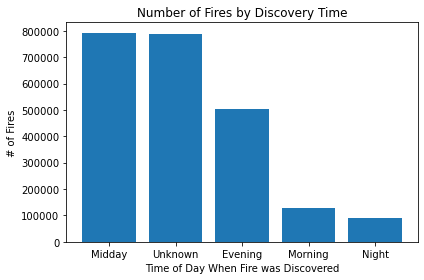

In [271]:
discovery_time=df['DISCOVERY_TIME'].value_counts()

plt.figure()
plt.bar(x=discovery_time.index, height=discovery_time.values)
# plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel('Time of Day When Fire was Discovered')
plt.ylabel('# of Fires')
plt.title('Number of Fires by Discovery Time')
plt.tight_layout()
plt.show()

In [272]:
# a look at the value counts and percents
dis_percents = (discovery_time / discovery_time.sum()) *100
discoverydf = pd.DataFrame({'Count': discovery_time, '%': dis_percents})
discoverydf

,Count,%
Midday,792065,34.438627
Unknown,787077,34.221751
Evening,503233,21.880343
Morning,126547,5.502206
Night,91010,3.957074


These categories are somewhat imbalanced, so we need to decide whether we should bin some more. One way we can do this is to compare the distribution of our target variable within these categories. 

<Figure size 432x288 with 0 Axes>

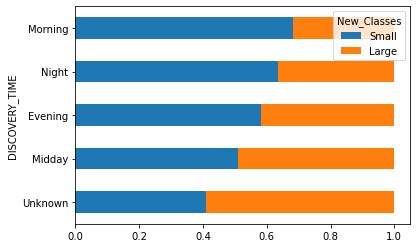

In [273]:
rates = df.groupby(['DISCOVERY_TIME', 'New_Classes'])['New_Classes'].count()/df.groupby('DISCOVERY_TIME')['New_Classes'].count()
plt.figure()
rates.unstack()[['Small', 'Large']].sort_values("Small").plot(kind = 'barh', stacked=True)
plt.show()

Since Night and Morning are actually quite close in terms of the distribution of the binary Fire Size Class and neither are particularly unique among the binary class, we can bin morning and night together into one class. Morning covers 0400-1000 and Night covers 2200-0400 which means they are adjecent. So our new binned category will cover fires discovered between 2200 and 1000. Because of this binning, I'm going to rename all the categories as strings denoting the range of times that they fall in. 

In [274]:
df.loc[df['DISCOVERY_TIME'] == 'Morning', 'DISCOVERY_TIME'] = 'Night or Morning'
df.loc[df['DISCOVERY_TIME'] == 'Night', 'DISCOVERY_TIME'] = 'Night or Morning'
df.loc[df['DISCOVERY_TIME'] == 'Evening', 'DISCOVERY_TIME'] = 'Evening'
df.loc[df['DISCOVERY_TIME'] == 'Midday', 'DISCOVERY_TIME'] = 'Midday'
discovery_time = df['DISCOVERY_TIME'].value_counts()
dis_percents = (discovery_time / discovery_time.sum()) *100
discoverydf = pd.DataFrame({'Count': discovery_time, '%': dis_percents})
discoverydf

,Count,%
Midday,792065,34.438627
Unknown,787077,34.221751
Evening,503233,21.880343
Night or Morning,217557,9.459280


In [275]:
#sanity check
df.head()

,FIRE_YEAR,DISCOVERY_TIME,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes,REGION
0,2005,Midday,33,Human,40.036944,-121.005833,Government,0.10,A,Small,West
1,2004,Night or Morning,133,Natural,38.933056,-120.404444,Government,0.25,A,Small,West
2,2004,Evening,152,Human,38.984167,-120.735556,Unknown,0.10,A,Small,West
3,2004,Midday,180,Natural,38.559167,-119.913333,Government,0.10,A,Small,West
4,2004,Midday,180,Natural,38.559167,-119.933056,Government,0.10,A,Small,West


In [276]:
df.columns

Index(['FIRE_YEAR', 'DISCOVERY_TIME', 'DISCOVERY_DOY',
       'NWCG_CAUSE_CLASSIFICATION', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'New_Classes', 'REGION'],
      dtype='object')

In [277]:
#rearrange columns
df = df[['FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME', \
         'NWCG_CAUSE_CLASSIFICATION', 'LATITUDE', \
         'LONGITUDE', 'OWNER_DESCR', 'REGION', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'New_Classes']]
df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,REGION,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes
0,2005,33,Midday,Human,40.036944,-121.005833,Government,West,0.10,A,Small
1,2004,133,Night or Morning,Natural,38.933056,-120.404444,Government,West,0.25,A,Small
2,2004,152,Evening,Human,38.984167,-120.735556,Unknown,West,0.10,A,Small
3,2004,180,Midday,Natural,38.559167,-119.913333,Government,West,0.10,A,Small
4,2004,180,Midday,Natural,38.559167,-119.933056,Government,West,0.10,A,Small


### Finalized DATA DICTIONARY

```FIRE_YEAR```: Calendar year in which the fire was discovered or confirmed to exist.

```FIRE_DURATION```: Duration of the fire, measured in days by subtracting the discovery date from the containment date. 

```FIRE_DOY```: The day of year directly between the discovery date and the containment date.

```DISCOVERY_TIME```: Time of day that the fire was discovered or confirmed to exist in four possible categories: Night or Morning (2200-1000), Midday (1000-1600), Evening (1600-2200), and Unknown. 

```CONT_TIME```: Time of day that the fire was declared contained or otherwise controlled in five possible categories: Morning (0400-1000), Night or Midday (1000-1600, 2200-0400), Evening (1600-2200), and Unknown. 

```NWCG_CAUSE_CLASSIFICATION```: Broad classification of the reason the fire occurred (Human, Natural, Unknown).

```LATITUDE```: Latitude (NAD83) for point location of the fire (decimal degrees).

```LONGITUDE```: Longitude (NAD83) for point location of the fire (decimal degrees).

```OWNER_DESCR```: Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident. Binned into three categories: Unknown, Private, and Government.

```Region```: Region based on the state in which the fire burned (or originated), based on the nominal designation in the fire report (not from a spatial overlay).

```FIRE_SIZE```: The estimate of acres within the final perimeter of the fire.

```FIRE_SIZE_CLASS```: Code for fire size based on the number of acres within the final fire perimeter (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

```New_Classes```: Binary Classification of fire size based on the number of acres within the final fire perimeter. Small = Less than one acre, Large = Greater than or equal to one acre.

In [278]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,REGION,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes
0,2005,33,Midday,Human,40.036944,-121.005833,Government,West,0.10,A,Small
1,2004,133,Night or Morning,Natural,38.933056,-120.404444,Government,West,0.25,A,Small
2,2004,152,Evening,Human,38.984167,-120.735556,Unknown,West,0.10,A,Small
3,2004,180,Midday,Natural,38.559167,-119.913333,Government,West,0.10,A,Small
4,2004,180,Midday,Natural,38.559167,-119.933056,Government,West,0.10,A,Small


__Starting to look at Trends__<br> Now let's begin to look more in depth at the trends within the data in order to familiarize ourselves with each feature of the data. 

In [279]:
#draw out numeric columns
cont_var = list(df.select_dtypes(include=['int64', 'float64']))
cont_var

['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE']

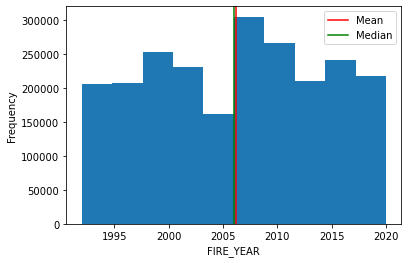

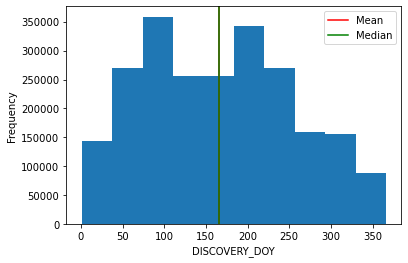

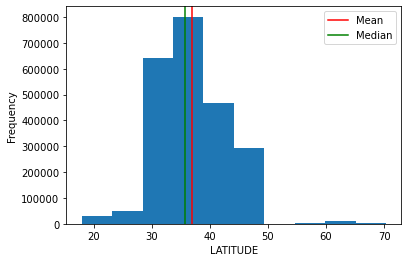

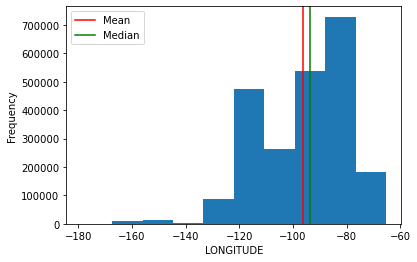

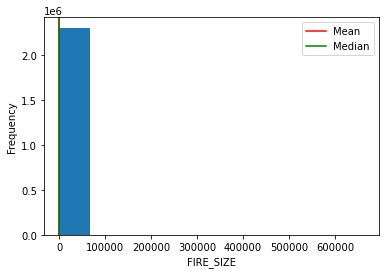

In [280]:
#loop through columns to plot histograms of each
for col in cont_var:
    
    # Save column values, mean, and median to variables
    var = df[col]
    var_mean = var.mean()
    var_median = var.median()

    # Plot a histogram of each column, with lines marking mean and median
    plt.figure()
    plt.hist(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

FIRE_SIZE seems to have an extremely skewed distribution. This leads me to believe that using the FIRE_SIZE_CLASS or our New_Classes variable bins would be a better approach.

__LONGITUDE__: this appears to have a left skew, with some fires occurring around 160º West, which is around where Hawaii is, which explains the skew. 
__LATITUDE__: This shows a similar trend, with a right skew due to fires in Alaska.

FIRE_YEAR and DISCOVERY_DOY both appear to be normal, with means and medians very close to one another. This makes for useful variables. 

Let's now make some visualizations to help us understand some of the underlying trends. First, we will look at the relationship between fire year and our target variable. 

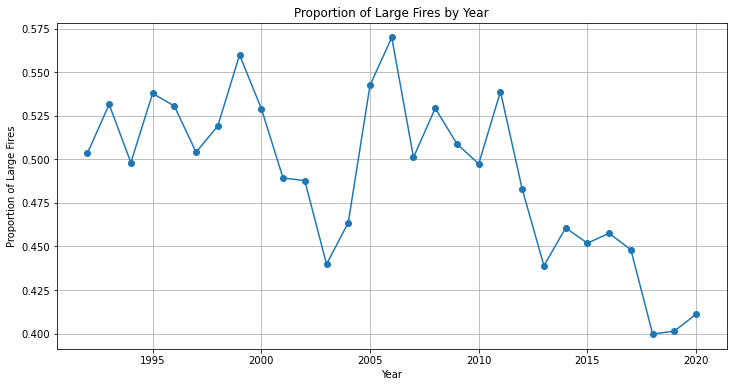

In [281]:
# Count the occurrences of "Large" fires by year.
large_fires_count = df[df['New_Classes'] == 'Large'].groupby('FIRE_YEAR')['New_Classes'].count()

# Calculate the total number of fires by year.
total_fires_count = df.groupby('FIRE_YEAR')['New_Classes'].count()

# Calculate the proportion of "Large" fires by dividing large_fires_count by total_fires_count.
proportion_large_fires = large_fires_count / total_fires_count

# Create a line plot to visualize the proportions.
plt.figure(figsize=(12, 6))
plt.plot(proportion_large_fires.index, proportion_large_fires, marker='o', linestyle='-')
plt.title('Proportion of Large Fires by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Large Fires')
plt.grid(True)

# Show the plot.
plt.show()

This graph shows the proportion of large fires in a given year through time from 1992 to 2020. As can be seen, there is some major fluctuation, but there appears to be a downward trend in the later years. From 2011 to 2020, it drops from about 54% large fires to 41% large fires. A 13% decrease seems significant, and may aid in predictive power. The key takeaway here is that there is large fluctuation across the years but a downward trend in the last few years of the study. 

Next, we will look at the Discovery day of year. A trend here may help us understand if larger fires are more common in the earlier or later part of the year. 

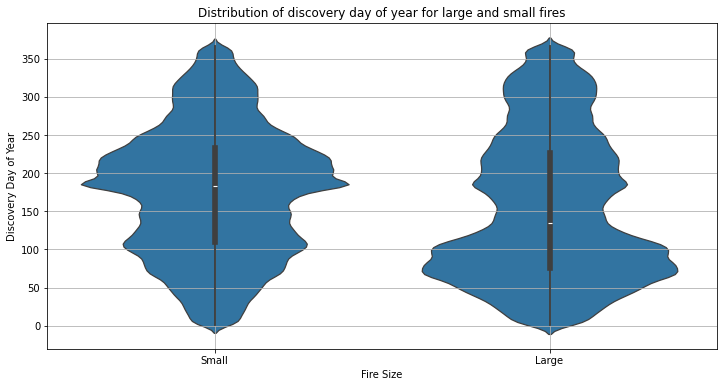

In [282]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='New_Classes', y='DISCOVERY_DOY', data=df)
plt.title('Distribution of discovery day of year for large and small fires')
plt.xlabel('Fire Size')
plt.ylabel('Discovery Day of Year')
plt.grid(True)
plt.show()

Here, we can see a couple things. Beginning with the small fires, they appear to be mostly centered in the summer time, around the middle of the year, with little skew to the distribution. By contrast, large fires appear to be relatively more frequent in the earlier portion of the year in springtime. Understanding this qualitative relationship can aid authorities, even in the absence of a predictive model. 

### Further EDA - Categorical Variables
Let's take a look at the categorical variables and their distributions.

In [283]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,REGION,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes
0,2005,33,Midday,Human,40.036944,-121.005833,Government,West,0.10,A,Small
1,2004,133,Night or Morning,Natural,38.933056,-120.404444,Government,West,0.25,A,Small
2,2004,152,Evening,Human,38.984167,-120.735556,Unknown,West,0.10,A,Small
3,2004,180,Midday,Natural,38.559167,-119.913333,Government,West,0.10,A,Small
4,2004,180,Midday,Natural,38.559167,-119.933056,Government,West,0.10,A,Small


In [284]:
cat = ['DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'OWNER_DESCR', 'REGION']

DISCOVERY_TIME


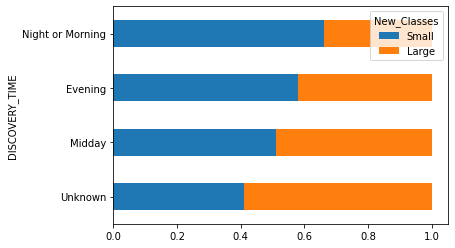


NWCG_CAUSE_CLASSIFICATION


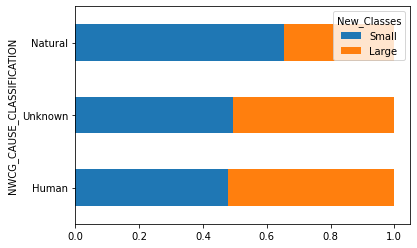


OWNER_DESCR


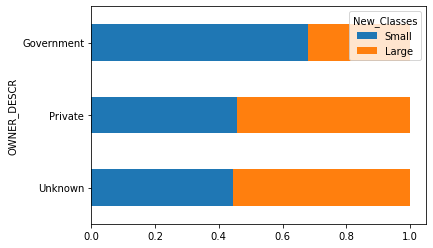


REGION


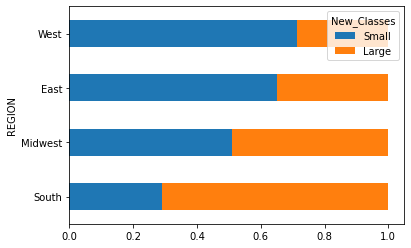

In [285]:
for column in cat:
    print(column)
    rates = df.groupby([column, 'New_Classes'])['New_Classes'].count()/df.groupby(column)['New_Classes'].count()
    rates.unstack()[['Small', 'Large']].sort_values("Small").plot(kind = 'barh', stacked=True)
    plt.show()
    print("===================================================================")
    print("")
    

In the bar plots above, we can detect a few key insights. One of the first is that within NWCG_CAUSE_CLASSIFICATION, there seems to be little difference in the class distribution between Unknown and Human causes. We see a similar relationship between the Private and Unknown categories within the OWNER_DESCR variable. There are a few ways we can approach this. Probably the best thing we can do is use the Unknown category as our reference category for when we one-hot encode them. This will eliminate the proportional similarity between them, and so we can focus on Government/Private or Human/Nature differences. Below, I have crosstab tables showing the differences in the proportions for each of the categories. While we could run statistical tests on them to see if the differences are statistically significant, this is unlikely to yield any insight because of our huge sample size. With such a large sample size, our test would have extreme statistical power and be able to detect minor, practically insignificant differences in the data. Because of this, it is better to evaluate it on a practical level by looking at the graphs and the contingency tables. 

In [286]:
contingency_table_cause = pd.crosstab(df['NWCG_CAUSE_CLASSIFICATION'], df['New_Classes'])
contingency_table_cause

New_Classes,Large,Small
NWCG_CAUSE_CLASSIFICATION,,
Human,926051,854172
Natural,113621,213431
Unknown,97335,95322


In [287]:
percent_crosstab = pd.crosstab(df['NWCG_CAUSE_CLASSIFICATION'], df['New_Classes'], normalize='index')*100
percent_crosstab

New_Classes,Large,Small
NWCG_CAUSE_CLASSIFICATION,,
Human,52.018820,47.981180
Natural,34.740959,65.259041
Unknown,50.522431,49.477569


In [288]:
contingency_table_owner = pd.crosstab(df['OWNER_DESCR'], df['New_Classes'])
contingency_table_owner

New_Classes,Large,Small
OWNER_DESCR,,
Government,176956,376209
Private,324338,272969
Unknown,631410,506375


In [289]:
owner_percents = pd.crosstab(df['OWNER_DESCR'], df['New_Classes'], normalize='index')*100
owner_percents

New_Classes,Large,Small
OWNER_DESCR,,
Government,31.989732,68.010268
Private,54.300050,45.699950
Unknown,55.494667,44.505333


As we can see from the graphs and the crosstabs, we can see that within NWCG_CAUSE_CLASSIFICATION, the proportional difference within the natural category is much greater than that of Human and Unknown, while human and Unknown have pretty similar proportions. This means that the human and unknown categories not significantly different (from a practical standpoint - remember a chi square test would probably yield significant results due to our sample size!). What we can gather very clearly from these results is that fires caused naturally are likely to be smaller than those with unknown causes or human causes. This could have good predictive power once we begin modeling. Further, this allows us to make a clear decision in regards to our preprocessing steps. When we one-hot encode the NWCG_CAUSE_CLASSIFICATION variable, the best choice for our reference category is 'Unknown'. This means there will be two resulting columns: 'Human_caused' (1 or 0) and 'Natural_caused' (1 or 0); and, if both are zeros this means that the cause is unknown. There is a substantial difference in the proportions between human and natural, so that will have predictive power. 

We have nearly an identical scenario for our OWNER_DESCR category. Here, the proportion of large and small fires is more unbalanced in the 'government' category, with many more smaller fires occurring. By contrast, the 'Private' and 'Unknown' categories have slightly more large fires than small fires, and are very similar. They are practically similar enough and gain the following insight: Government owned property is more likely to have wildfires that don't reach as large of a final acreage as compared with private property and unknown. And, similar to cause classification, we can come to a similar conclusion regarding our preprocessing: when we one-hot encode the OWNER_DESCR, we will have 'Government_property' and 'Private_property' and unknown will be our reference category. This will optimize predictive power once we start modeling. 

In [290]:
disc_crosstab = pd.crosstab(df['DISCOVERY_TIME'], df['New_Classes'], normalize='index')*100
disc_crosstab

New_Classes,Large,Small
DISCOVERY_TIME,,
Evening,41.962471,58.037529
Midday,49.023628,50.976372
Night or Morning,33.741502,66.258498
Unknown,58.969072,41.030928


In [291]:
df['DISCOVERY_TIME'].value_counts()

Midday              792065
Unknown             787077
Evening             503233
Night or Morning    217557
Name: DISCOVERY_TIME, dtype: int64

Now we can take a look at DISCOVERY_TIME. Between our four categories, we can see a nice spread in the proportions of small and large fires, with more small fires occurring between 2200 and 1000. On the other extreme end, fires which have an unknown discovery time have a greater proportion of large fires. This is interesting because it shows that a fire about which less is known (especially finding the fire) is more likely to be larger. This could have some good predictive power. Since unknown is one of the more prevalent categories, it will be a good reference category. Further, this would result in all of the encoded variables describing actual times, and zeros across all of them indicates an "unknown" discovery time, making the results interpretable. 

Finally, let's take a look at REGION:

In [292]:
reg_crosstab = pd.crosstab(df['REGION'], df['New_Classes'], normalize='index')*100
reg_crosstab

New_Classes,Large,Small
REGION,,
East,35.007583,64.992417
Midwest,49.081647,50.918353
South,70.893574,29.106426
West,28.680178,71.319822


In [293]:
df['REGION'].value_counts()

South      893222
West       765717
Midwest    457776
East       145060
Name: REGION, dtype: int64

For region, we will use the South as our reference category since it is the largest category. While it does have the most imbalanced results in terms of the fire size binary classes, this is still a good choice for our reference category because of the relative size of the category. Further, the predictive power of that encoded variable will still be captured by the other encoded variables, so we can justify keeping it. 

__Final Preprocessing: One-Hot Encoding__

In [294]:
final_df = df
final_df

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,LATITUDE,LONGITUDE,OWNER_DESCR,REGION,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes
0,2005,33,Midday,Human,40.036944,-121.005833,Government,West,0.10,A,Small
1,2004,133,Night or Morning,Natural,38.933056,-120.404444,Government,West,0.25,A,Small
2,2004,152,Evening,Human,38.984167,-120.735556,Unknown,West,0.10,A,Small
3,2004,180,Midday,Natural,38.559167,-119.913333,Government,West,0.10,A,Small
4,2004,180,Midday,Natural,38.559167,-119.933056,Government,West,0.10,A,Small
...,...,...,...,...,...,...,...,...,...,...,...
2303561,2020,157,Evening,Natural,39.037890,-108.959500,Unknown,West,1.00,B,Large
2303562,2020,193,Evening,Unknown,37.148611,-119.503056,Private,West,100.00,D,Large
2303563,2020,240,Evening,Natural,46.151370,-114.442800,Unknown,West,50.00,C,Large
2303564,2020,230,Night or Morning,Natural,46.670340,-120.114500,Government,West,24892.00,G,Large


Our final step is to one-hot encode our categorical variables, and then our data will be ready to start running models on! Our reference categories will be as follows for each categorical variable:
- DISCOVERY_TIME: 'Unknown'
- NWCG_CAUSE_CLASSIFICATION: 'Unknown'
- OWNER_DESCR: 'Unknown'
- REGION: 'South'

In [295]:
#get dummies
final_df = pd.get_dummies(final_df, columns = ['DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION', 'OWNER_DESCR', 'REGION'])
final_df.columns

Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'New_Classes', 'DISCOVERY_TIME_Evening',
       'DISCOVERY_TIME_Midday', 'DISCOVERY_TIME_Night or Morning',
       'DISCOVERY_TIME_Unknown', 'NWCG_CAUSE_CLASSIFICATION_Human',
       'NWCG_CAUSE_CLASSIFICATION_Natural',
       'NWCG_CAUSE_CLASSIFICATION_Unknown', 'OWNER_DESCR_Government',
       'OWNER_DESCR_Private', 'OWNER_DESCR_Unknown', 'REGION_East',
       'REGION_Midwest', 'REGION_South', 'REGION_West'],
      dtype='object')

In [296]:
final_df.drop(['DISCOVERY_TIME_Unknown', 
               'NWCG_CAUSE_CLASSIFICATION_Unknown', 
               'OWNER_DESCR_Unknown', 'REGION_South'], axis=1, inplace=True)
final_df.head()

,FIRE_YEAR,DISCOVERY_DOY,LATITUDE,LONGITUDE,FIRE_SIZE,FIRE_SIZE_CLASS,New_Classes,DISCOVERY_TIME_Evening,DISCOVERY_TIME_Midday,DISCOVERY_TIME_Night or Morning,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Natural,OWNER_DESCR_Government,OWNER_DESCR_Private,REGION_East,REGION_Midwest,REGION_West
0,2005,33,40.036944,-121.005833,0.10,A,Small,0,1,0,1,0,1,0,0,0,1
1,2004,133,38.933056,-120.404444,0.25,A,Small,0,0,1,0,1,1,0,0,0,1
2,2004,152,38.984167,-120.735556,0.10,A,Small,1,0,0,1,0,0,0,0,0,1
3,2004,180,38.559167,-119.913333,0.10,A,Small,0,1,0,0,1,1,0,0,0,1
4,2004,180,38.559167,-119.933056,0.10,A,Small,0,1,0,0,1,1,0,0,0,1


In [297]:
#Rename binary target variable
final_df.rename(columns={'New_Classes': 'SIZE_BINARY_CLASS'}, inplace=True)

In [298]:
final_df.columns

Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'SIZE_BINARY_CLASS', 'DISCOVERY_TIME_Evening',
       'DISCOVERY_TIME_Midday', 'DISCOVERY_TIME_Night or Morning',
       'NWCG_CAUSE_CLASSIFICATION_Human', 'NWCG_CAUSE_CLASSIFICATION_Natural',
       'OWNER_DESCR_Government', 'OWNER_DESCR_Private', 'REGION_East',
       'REGION_Midwest', 'REGION_West'],
      dtype='object')

In [299]:
#rearrange columns
final_df = final_df[['SIZE_BINARY_CLASS', 'FIRE_SIZE_CLASS', 'FIRE_SIZE', \
                     'FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', \
                     'DISCOVERY_TIME_Evening', 'DISCOVERY_TIME_Midday', \
                     'DISCOVERY_TIME_Night or Morning', \
                     'NWCG_CAUSE_CLASSIFICATION_Human', 'NWCG_CAUSE_CLASSIFICATION_Natural', \
                     'OWNER_DESCR_Government', 'OWNER_DESCR_Private', 'REGION_East', \
                     'REGION_Midwest', 'REGION_West']]
final_df.head()

,SIZE_BINARY_CLASS,FIRE_SIZE_CLASS,FIRE_SIZE,FIRE_YEAR,DISCOVERY_DOY,LATITUDE,LONGITUDE,DISCOVERY_TIME_Evening,DISCOVERY_TIME_Midday,DISCOVERY_TIME_Night or Morning,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Natural,OWNER_DESCR_Government,OWNER_DESCR_Private,REGION_East,REGION_Midwest,REGION_West
0,Small,A,0.10,2005,33,40.036944,-121.005833,0,1,0,1,0,1,0,0,0,1
1,Small,A,0.25,2004,133,38.933056,-120.404444,0,0,1,0,1,1,0,0,0,1
2,Small,A,0.10,2004,152,38.984167,-120.735556,1,0,0,1,0,0,0,0,0,1
3,Small,A,0.10,2004,180,38.559167,-119.913333,0,1,0,0,1,1,0,0,0,1
4,Small,A,0.10,2004,180,38.559167,-119.933056,0,1,0,0,1,1,0,0,0,1


### Saving the data

Now that we have spent the time cleaning and exploring this dataset. We are going to save it down to file for now. In the next Jupyter Notebook, we will begin modeling (using a sample of the dataset). 

In [300]:
print(f'The cleaned and preprocessed data has {final_df.shape[0]} rows and {final_df.shape[1]} columns')

The cleaned and preprocessed data has 2299932 rows and 17 columns


In [301]:
final_df.to_csv('clean_data.csv', index=False)

In [302]:
#Sanity check - make sure the new csv looks the way we want it to.
clean_df = pd.read_csv('clean_data.csv')
clean_df.head()

,SIZE_BINARY_CLASS,FIRE_SIZE_CLASS,FIRE_SIZE,FIRE_YEAR,DISCOVERY_DOY,LATITUDE,LONGITUDE,DISCOVERY_TIME_Evening,DISCOVERY_TIME_Midday,DISCOVERY_TIME_Night or Morning,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Natural,OWNER_DESCR_Government,OWNER_DESCR_Private,REGION_East,REGION_Midwest,REGION_West
0,Small,A,0.10,2005,33,40.036944,-121.005833,0,1,0,1,0,1,0,0,0,1
1,Small,A,0.25,2004,133,38.933056,-120.404444,0,0,1,0,1,1,0,0,0,1
2,Small,A,0.10,2004,152,38.984167,-120.735556,1,0,0,1,0,0,0,0,0,1
3,Small,A,0.10,2004,180,38.559167,-119.913333,0,1,0,0,1,1,0,0,0,1
4,Small,A,0.10,2004,180,38.559167,-119.933056,0,1,0,0,1,1,0,0,0,1


# Notebook Conclusion

In this notebook, I sought to clean the data, gain a thorough understanding of underlying trends especially pertaining to our target variable, and preprocess the data in order to prepare it for modeling. In our next notebook, "Traditional ML", I will begin modeling using traditional machine learning methods in order to try to predict our target variable of fire size as a binary variable. 